In [1]:
from LTP import *

datapath = '../data/'
MIAdir = '../dirs/Directory_2022_SummerMIAPilot.csv'
SUREdir = '../dirs/Directory_2022_SURE.csv'


Pickle already exists. If you would like to overwrite, please rerun with overwrite = TRUE


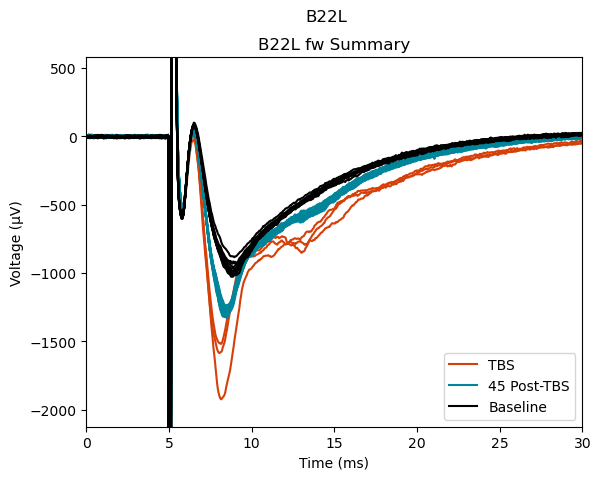

In [5]:
# data = batch_from_csv(MIAdir,('22',4),['B22R'],datapath=datapath)['B22R']

data = batch_from_csv(MIAdir,('22',4),['B22L'],datapath=datapath)['B22L']
data.pickle_df('../data/')
data.trace_summary()


In [36]:

def tsum(self: Raw, ch='fw', autotrim=True, all=False, fw=True):
        '''
        Displays the trace summary overlay for a given channel.

        Args:
            ch (str): Designation of the channel to be displayed.
                - 'fw': Experimental forward channel (default).
                - 'rev': Experimental reverse channel.
                - '1' through '64': Non-experimental channels.
            autotrim (bool): Boolean for whether or not to automatically trim the graph. Default is False.
            all (bool): Boolean for whether to include the full baseline or just the last 10 minutes. Default is False.
            fw (bool): Boolean for whether to use forward stimulation indexing when using a non-experimental channel.
                            Default is True.

        Returns:
            None. Displays the trace summary overlay plot.

        Raises:
            Exception: If the 'ch' argument is invalid (not 'fw', 'rev', or '1~64').

        Note:
            - 'fw': Experimental forward channel, 'rev': Experimental reverse channel.
            - '1' through '64': Non-experiment channels.
            - 'fw' and 'rev' channels are taken from the 'self.fw' and 'self.rev' arrays, respectively.
            - Non-experimental channels are taken from 'self.full' dictionary using the provided 'ch' as the key.
            - The 'autotrim' option allows trimming of the graph to remove empty spaces around the traces.
            - The 'all' option includes the full baseline if True, otherwise only the last 10 minutes are shown.
            - The 'fw' option is relevant when using non-experimental channels and decides whether to use forward
                stimulation indexing (True) or reverse stimulation indexing (False).
        '''

        if ch == 'fw':
            arr = self.fw
            tl = 'fw'
        elif ch == 'rev':
            arr = self.rev
            tl = 'rev'
        else:
            if int(ch) not in range(1, NC + 1):
                raise Exception(f"Please enter a valid channel ('fw', 'rev', or '1~{NC}').")
            elif fw:
                arr = self.full[f'ch{ch}_mV'][::2]
                tl = 'fw'
            else:
                arr = self.full[f'ch{ch}_mV'][1::2]
                tl = 'rev'

        N = len(arr)
        bl = []
        tet = []
        post45 = []

        # Extract indices for 'baseline', 'TBS', and '45post-TBS' events
        for i in range(N):
            if tl == 'fw':
                ind = 1 + i * 2
            else:
                ind = 2 + i * 2
            if self.timeline[tl][i] == 'baseline':
                bl.append(ind)
            elif self.timeline[tl][i] == 'TBS':
                tet.append(ind)
            elif self.timeline[tl][i] == '45post-TBS':
                post45.append(ind)
            elif all:
                bl.append(ind)

        # Plot the trace summary overlay
        plt.figure()

        self.display_traces(tet, autotrim=autotrim, overlay=True, d=False, color=TBScolor, label='Tetanus')
        self.display_traces(post45, autotrim=autotrim, overlay=True, d=False, color=POST45color, label='Early LTP')
        self.display_traces(bl, autotrim=autotrim, overlay=True, d=False, color=BASELINEcolor, label='Baseline')
        handles, labels = plt.gca().get_legend_handles_labels()
        order = [2,0,1]
        plt.legend([handles[i] for i in order],
                   [labels[i] for i in order], loc='lower right')

        plt.title(f"Representative Phase Overlay")
        plt.suptitle('')
        plt.xlim(4,20)
        plt.ylim(-2000,200)
        plt_resize_text()
        plt.savefig("phaseoverlay")
        


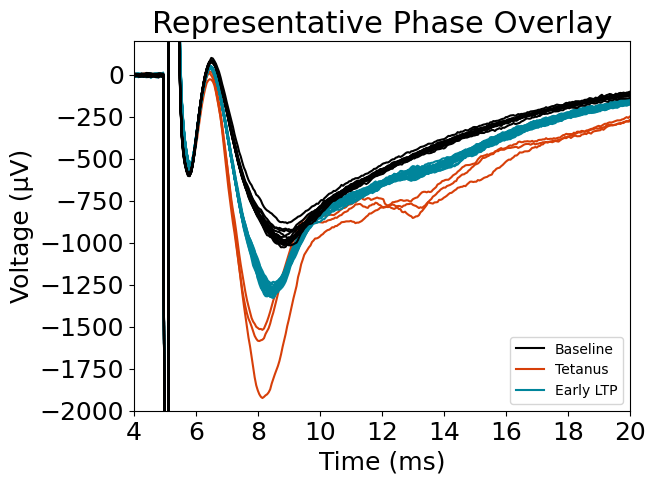

In [37]:
tsum(data)